<a href="https://colab.research.google.com/github/SerArtDev/redes-neuronales/blob/main/keras_aumento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aumento de datos con Keras

Estas técnicas consisten en generar más muestras a partir de las que se tienen con el fin de entrenar el modelo de forma más robusta y evitando el overfitting. Esto se hace haciendo variaciones a las muestras ya existentes, como transformaciones, aumento del brillo, funciones de preprocesamiento, escarlarlas, rotarlas, etc.

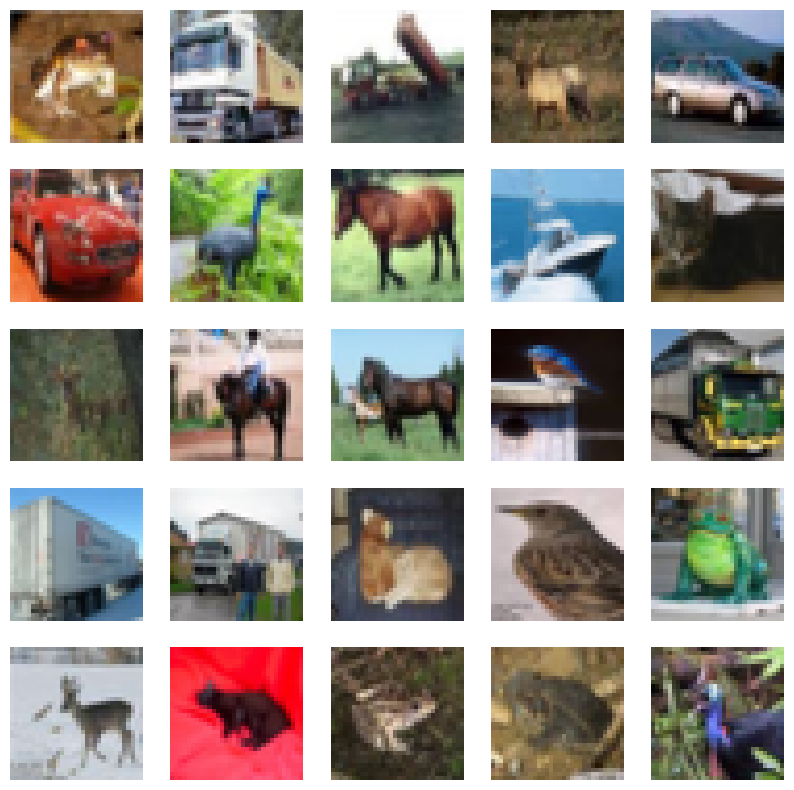

In [3]:
# Para este ejemplo se usarán imágenes para generar otras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargamos el conjunto de datos CIFAR-10 para entrenamiento de imágenes
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalización de datos de pixeles
x_train = x_train.astype('float32') / 255.0
y_train = y_train.astype('float32') / 255.0

# Mostrar algunas imágenes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

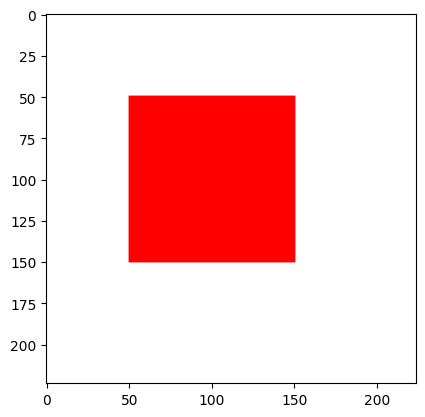

In [6]:
# Creamos una imagen en blanco
from PIL import Image, ImageDraw

image = Image.new("RGB", (224, 224), color=(255, 255, 255))
# Le dibujamos un rectángulo rojo
draw = ImageDraw.Draw(image)
draw.rectangle((50, 50, 150, 150), fill=(255, 0, 0))
plt.imshow(image)
plt.show()
image.save("image.png")

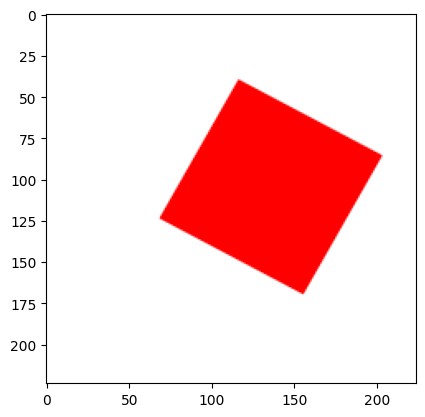

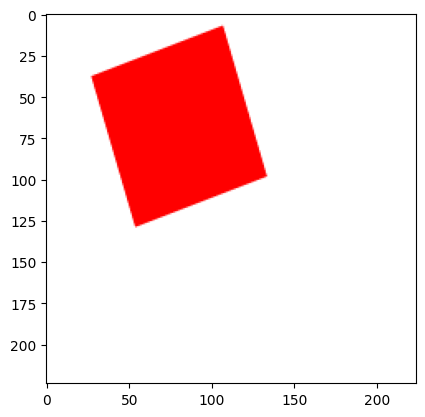

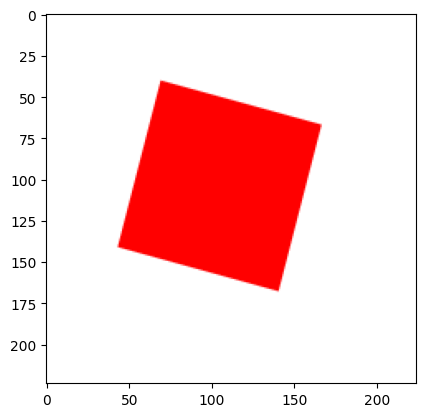

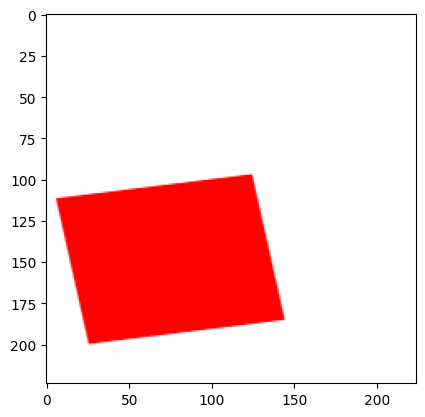

In [8]:
from textwrap import fill
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Cargamos la imagen
image = load_img("image.png", target_size=(224, 224))
# Convertimos la imagen en un array
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

# Creamos un generador de imágenes con parámetros que modifica al azar en las
# muestras
datagen = ImageDataGenerator(
    rotation_range=40, # Modifica la rotación hasta 40 grados
    width_shift_range=0.2, # Modifica el ancho hasta 20%
    height_shift_range=0.2, # Modifica la altura hasta 20%
    shear_range=0.2, # Aplica un sizallamiento
    zoom_range=0.2, # Escala las imágenes hasta un 20%
    fill_mode="nearest", # Filtro aplicado
    horizontal_flip=True, # La imagen se voltea horizontalmente 50% de las veces
    vertical_flip=True,
)

# Entrenamos al generador de imágenes con la muestra que hicimos
datagen.fit(x)

# Generamos varias imágenes y las mostramos
# El método flow genera imágenes en la marcha consumiendo menos memoria que si
# lo hiciera de una sola vez y tenerlas almacenadas.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break
plt.show()

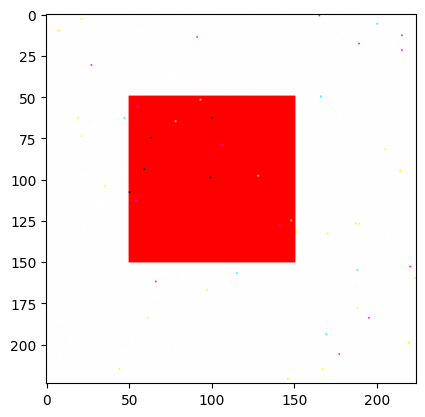

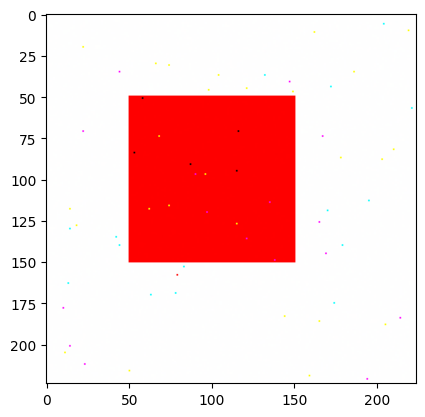

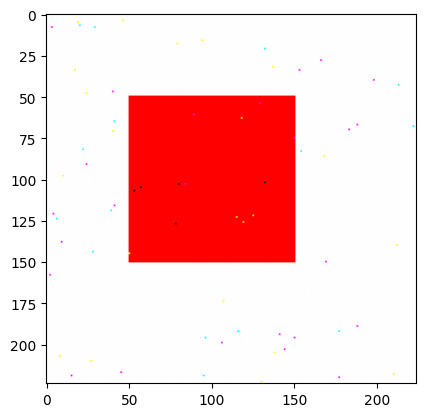

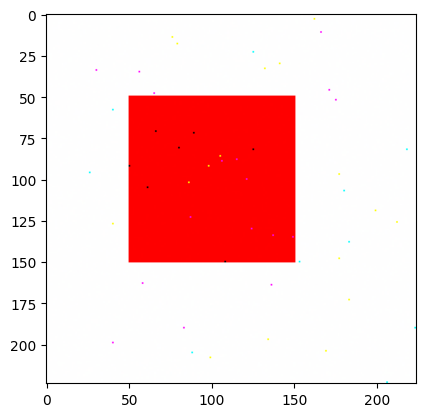

In [12]:
# Podemos añadirle ruido a la imágenes con numpy
def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.3, size=image.shape)
    return image + noise

# Esta función puede ser usada como preprocesamiento para el generador
datagen = ImageDataGenerator(preprocessing_function=add_noise)

# Generamos lotes de imágenes con ruido
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

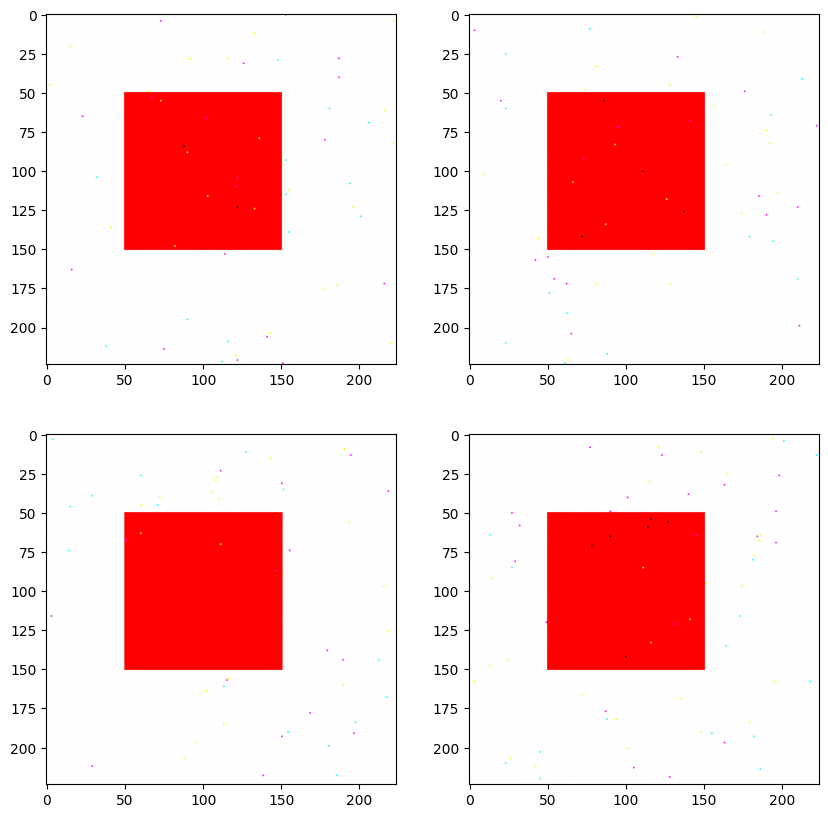

In [13]:
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # Show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()
